# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

# Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pathlib

# Dataset

In [2]:
data_dir = pathlib.Path('App/res/images_AI/')

image_count = len(list(data_dir.glob('*/*.png')))
print(f"The number of images is :{image_count}")


The number of images is :80


# Creating a dataset for Keras

In [3]:
# Parametres
batch_size = 32
img_height = 160
img_width = 160

input_shape=(img_height, img_width, 3)


# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 20 classes.
Using 64 files for training.
Found 80 files belonging to 20 classes.
Using 16 files for validation.


## Checking classes

In [4]:
class_names = train_ds.class_names
print(class_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


# Visualize the data

In [5]:
#plt.figure(figsize=(10, 10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

## Manual retrieving of images by batch

In [6]:
#for image_batch, labels_batch in train_ds:
#  print(image_batch.shape)
#  print(labels_batch.shape)
#  break

## Performance

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data normalization example

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Model creation

In [10]:
num_classes = 20

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# model.summary()

# Model training

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 1s 625ms/step - loss: 3.6988 - accuracy: 0.0625 - val_loss: 3.4020 - val_accuracy: 0.0625
Epoch 2/10
2/2 [==============================] - 0s 219ms/step - loss: 3.4679 - accuracy: 0.0208 - val_loss: 3.0404 - val_accuracy: 0.1875
Epoch 3/10
2/2 [==============================] - 0s 206ms/step - loss: 3.0909 - accuracy: 0.0729 - val_loss: 2.9761 - val_accuracy: 0.1875
Epoch 4/10
2/2 [==============================] - 0s 249ms/step - loss: 2.9929 - accuracy: 0.0417 - val_loss: 2.9837 - val_accuracy: 0.0625
Epoch 5/10
2/2 [==============================] - 0s 263ms/step - loss: 2.9587 - accuracy: 0.1562 - val_loss: 2.9961 - val_accuracy: 0.1250
Epoch 6/10
2/2 [==============================] - 0s 217ms/step - loss: 2.9331 - accuracy: 0.2500 - val_loss: 3.0078 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 217ms/step - loss: 2.9031 - accuracy: 0.3646 - val_loss: 3.0192 - val_accuracy: 0.0625
Epoch 8/10
2/2 [

# Visualize training results

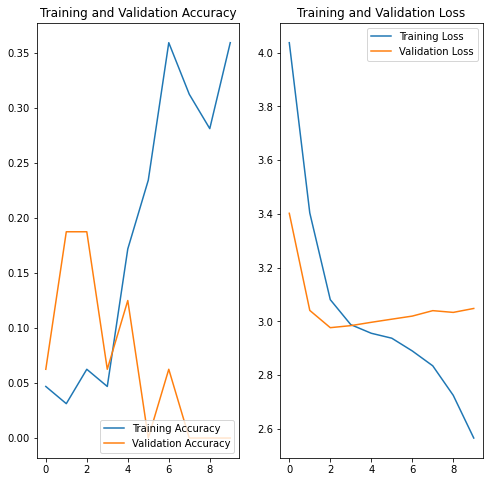

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the basic model

In [15]:
img_dir = "App/res/images_AI/"
img_names = {'green.png', 'purple.png', 'red.png', 'yellow.png'}

# images vars
#img_dir = "App/res/images/";
#img_names = {'jaune.png', 'rouge.png', 'vert.jpg', 'violet.png'}

cpt_green = 0
cpt_purple = 0
cpt_red = 0
cpt_yellow = 0

for i in range(1, 21):
    for name in img_names: 
    
      img = keras.preprocessing.image.load_img(
          img_dir + str(i) + '/' + str(i) + name, target_size=(img_height, img_width)
      )

      # draw the chart containing the image with boxes
      #plt.imshow(img)
      #plt.title(name)
      #plt.show()
        
      img_array = keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])

        
      number = class_names[np.argmax(score)]
    
      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
      )

      if( int(number) == i ):
            if( name == 'green.png' ): 
                cpt_green += 1
            if( name == 'purple.png' ): 
                cpt_purple += 1
            if( name == 'red.png' ): 
                cpt_red += 1
            if( name == 'yellow.png' ): 
                cpt_yellow += 1

print("Number of correct red = " + str(cpt_red))
print("Number of correct purple = " + str(cpt_purple))
print("Number of correct green = " + str(cpt_green))
print("Number of correct yellow = " + str(cpt_yellow))

This image most likely belongs to 9 with a 11.82 percent confidence.
This image most likely belongs to 1 with a 9.01 percent confidence.
This image most likely belongs to 9 with a 8.24 percent confidence.
This image most likely belongs to 8 with a 9.52 percent confidence.
This image most likely belongs to 9 with a 9.16 percent confidence.
This image most likely belongs to 2 with a 14.45 percent confidence.
This image most likely belongs to 9 with a 14.03 percent confidence.
This image most likely belongs to 9 with a 8.39 percent confidence.
This image most likely belongs to 3 with a 12.58 percent confidence.
This image most likely belongs to 8 with a 10.97 percent confidence.
This image most likely belongs to 3 with a 14.44 percent confidence.
This image most likely belongs to 5 with a 8.04 percent confidence.
This image most likely belongs to 8 with a 8.10 percent confidence.
This image most likely belongs to 4 with a 8.30 percent confidence.
This image most likely belongs to 4 with a

# Data augmentation

Doesn't work: NotImplementedError when adding input_shape (something with NumPy calls inside Keras.Sequential)

# Dropout without data augmentation

In [16]:
num_classes = 20

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Dropout with Data augmentation

Doesn't work because of an error in Data Augmentation part

# Recompiling the model

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)       

## Retraining the model

In [19]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
2/2 [==============================] - 1s 438ms/step - loss: 3.1675 - accuracy: 0.0417 - val_loss: 3.0879 - val_accuracy: 0.0625
Epoch 2/15
2/2 [==============================] - 1s 289ms/step - loss: 2.9787 - accuracy: 0.0521 - val_loss: 3.0305 - val_accuracy: 0.0625
Epoch 3/15
2/2 [==============================] - 0s 276ms/step - loss: 2.8446 - accuracy: 0.2812 - val_loss: 3.0516 - val_accuracy: 0.0625
Epoch 4/15
2/2 [==============================] - 0s 255ms/step - loss: 2.7924 - accuracy: 0.3542 - val_loss: 3.1046 - val_accuracy: 0.0000e+00
Epoch 5/15
2/2 [==============================] - 0s 246ms/step - loss: 2.6524 - accuracy: 0.3125 - val_loss: 3.1729 - val_accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 285ms/step - loss: 2.4243 - accuracy: 0.3542 - val_loss: 3.1730 - val_accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 223ms/step - loss: 2.1145 - accuracy: 0.5625 - val_loss: 3.2497 - val_accuracy: 0.0625
Epoch 8/

# Visualize the new results

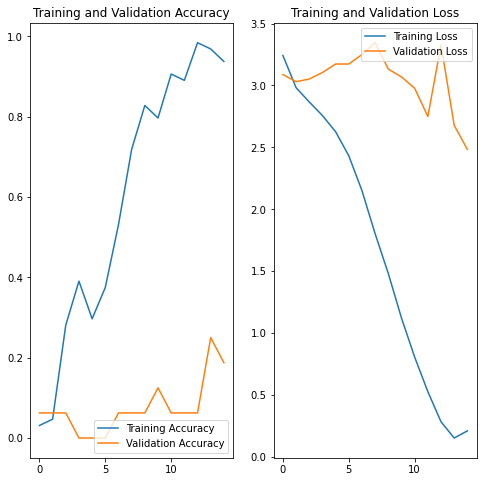

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the model

In [21]:
img_dir = "App/res/images_AI/"
img_names = {'green.png', 'purple.png', 'red.png', 'yellow.png'}

# images vars
#img_dir = "App/res/images/";
#img_names = {'jaune.png', 'rouge.png', 'vert.jpg', 'violet.png'}

cpt_green = 0
cpt_purple = 0
cpt_red = 0
cpt_yellow = 0

for i in range(1, 21):
    for name in img_names: 
    
      img = keras.preprocessing.image.load_img(
          img_dir + str(i) + '/' + str(i) + name, target_size=(img_height, img_width)
      )

      # draw the chart containing the image with boxes
      #plt.imshow(img)
      #plt.title(name)
      #plt.show()
        
      img_array = keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])

        
      number = class_names[np.argmax(score)]
    
      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
      )

      if( int(number) == i ):
            if( name == 'green.png' ): 
                cpt_green += 1
            if( name == 'purple.png' ): 
                cpt_purple += 1
            if( name == 'red.png' ): 
                cpt_red += 1
            if( name == 'yellow.png' ): 
                cpt_yellow += 1

print("Number of correct red = " + str(cpt_red))
print("Number of correct purple = " + str(cpt_purple))
print("Number of correct green = " + str(cpt_green))
print("Number of correct yellow = " + str(cpt_yellow))

This image most likely belongs to 1 with a 96.94 percent confidence.
This image most likely belongs to 1 with a 95.71 percent confidence.
This image most likely belongs to 1 with a 77.19 percent confidence.
This image most likely belongs to 1 with a 97.26 percent confidence.
This image most likely belongs to 2 with a 95.85 percent confidence.
This image most likely belongs to 2 with a 99.96 percent confidence.
This image most likely belongs to 7 with a 51.39 percent confidence.
This image most likely belongs to 5 with a 35.32 percent confidence.
This image most likely belongs to 3 with a 98.76 percent confidence.
This image most likely belongs to 3 with a 98.90 percent confidence.
This image most likely belongs to 3 with a 99.98 percent confidence.
This image most likely belongs to 3 with a 47.61 percent confidence.
This image most likely belongs to 8 with a 39.83 percent confidence.
This image most likely belongs to 4 with a 99.68 percent confidence.
This image most likely belongs to 

# Saving the model

In [22]:
model.save('AI_Token_Recognition')

INFO:tensorflow:Assets written to: AI_Token_Recognition/assets


# Loading the model

In [23]:
new_model = keras.models.load_model('AI_Token_Recognition')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)       

# Converting the model to Tensorflow Lite

To use in a Python file

## From a SavedModel on the disk

## From a Keras model trained in the same file